In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("BlackFriday.csv")

del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [10]:
for column in df.columns:
    print(df[column].nunique(),"\t:", column)

5891 	: User_ID
3623 	: Product_ID
2 	: Gender
7 	: Age
21 	: Occupation
3 	: City_Category
5 	: Stay_In_Current_City_Years
2 	: Marital_Status
18 	: Product_Category_1
17959 	: Purchase


In [11]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

## Gender Ratio/ How many male and Female purchase?

`Here we getting how many Male and Female are there using len() function`

In [15]:
len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])

(405380, 132197)

`Here we creating a ratio between Male and Female`

In [17]:
data = pd.DataFrame({"Ratio" : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, index = ['Male','Female'])

In [18]:
data

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

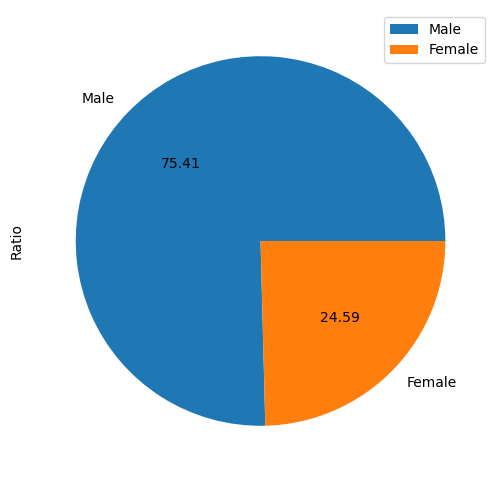

In [22]:
data.plot.pie(y = 'Ratio',figsize = (6,6), autopct = "%.2f")

`2 - Approach using groupby() function`

`if i use size() it will return in Gender column how many category are there in this time having Male and Female and each Time How many Category that is Present`

In [23]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: title={'center': 'Gender Ratio'}>

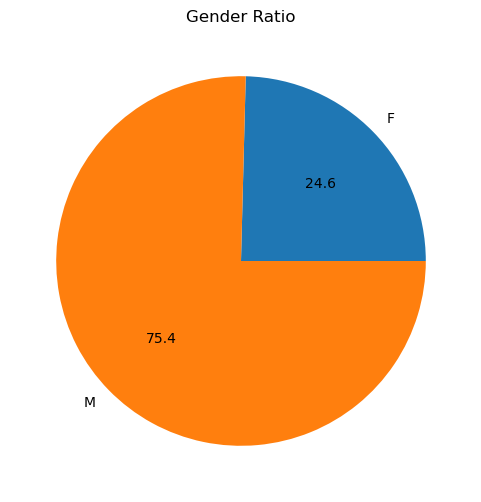

In [26]:
df.groupby('Gender').size().plot(kind = "pie",
                                 autopct = "%.1f",
                                 title = 'Gender Ratio',
                                 figsize = (6,6)
                                )

<Axes: xlabel='Gender'>

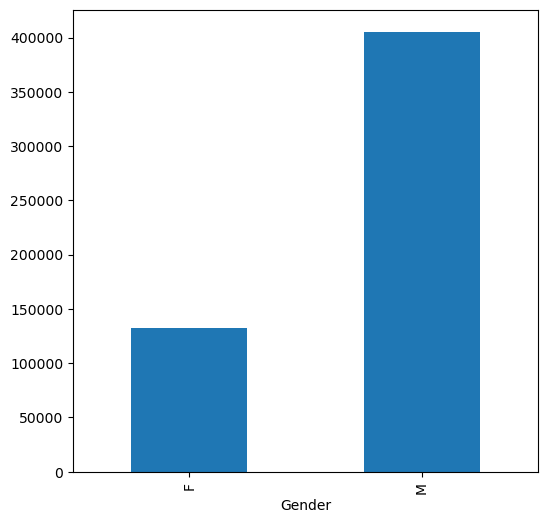

In [27]:
df.groupby('Gender').size().plot(kind = "bar",
                    
                                 figsize = (6,6)
                                )

## How many amount spent by man and female in purchase?

In [28]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

`Here, df.groupby('Gender')['Purchase'].sum() in this sum() is refer to the total aoumnt spent by male and female`

<Axes: title={'center': 'Amount spent by man and female in purchase'}, ylabel='Purchase'>

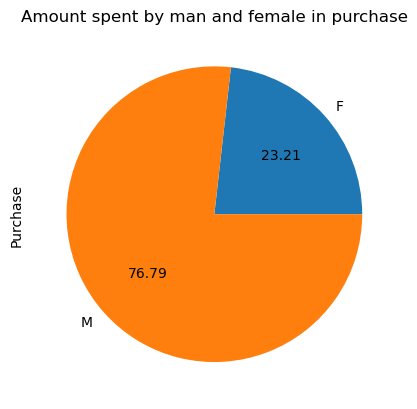

In [35]:
df.groupby('Gender')['Purchase'].sum().plot(kind = "pie",
                                            autopct = "%.2f",
                                            title = 'Amount spent by man and female in purchase'
                                           )

`Here, df.groupby('Gender')['Purchase'].mean() in this mean() is refer to the Anerage aoumnt spent by male and female and we can see that male and female spent almost same amount of money in per purchase`

<Axes: title={'center': 'Amount spent by man and female in purchase'}, ylabel='Purchase'>

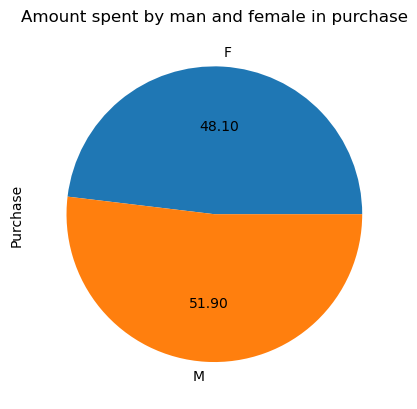

In [36]:
df.groupby('Gender')['Purchase'].mean().plot(kind = "pie",
                                            autopct = "%.2f",
                                            title = 'Amount spent by man and female in purchase'
                                           )